In [1]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

from pyresample import load_area
import numpy as np
import matplotlib.pyplot as plt

## Read NetCDF File

In [3]:
# Import Satellite Object
from hypso import Hypso1
import os

# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Dokumenter/Data/frohavet'
l1a_nc_file = os.path.join(dir_path, 'frohavet_2024-05-06_1017Z-l1a.nc')
points_file = os.path.join(dir_path, 'frohavet_2024-05-06_1017Z-bin3.points')

# Create Satellite Object
satobj = Hypso1(path=l1a_nc_file, points_path=points_file, verbose=True)

[INFO] Loading L1a capture frohavet_2024-05-06_1017Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Using UTM map: WGS 84 / UTM zone 32N EPSG: 32632


## Generate L1B datacube

In [4]:
satobj.generate_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


## Generate chlorophyll estimates

In [5]:
satobj.generate_chlorophyll_estimates('band_ratio')

[INFO] Running band ratio chlorophyll estimation...


## Create test products

In [6]:
satobj.products['demo_product_1'] = satobj.chl['band_ratio'] * 2
satobj.products['demo_product_2'] = satobj.chl['band_ratio'] * 3

## Load area definition

In [7]:
area_def = load_area("./frohavet_demo.yaml")

In [8]:
area_def

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Area ID: frohavet
Description: roi
Projection: {'ellps': 'bessel', 'lat_0': '90', 'lat_ts': '63.9537056254799', 'lon_0': '9.45716076150201', 'no_defs': 'None', 'proj': 'stere', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 611
Number of rows: 1173
Area extent: (-97518.172, -2982987.184, 86005.9804, -2630840.3038)

## Resampling with pyresample

### Resample L1A cube

In [9]:
resampled_l1a_cube = satobj.resample_l1a_cube(area_def=area_def)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [10]:
resampled_l1a_cube

<xarray.DataArray (y: 1173, x: 611, band: 120)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Dimensions without coordinates: y, x, band
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

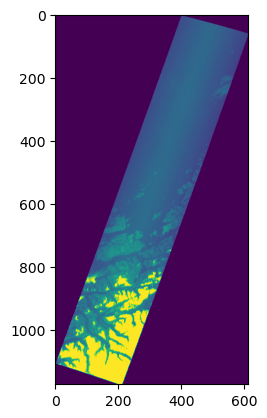

In [11]:
plt.imshow(resampled_l1a_cube[:,:,40])

### Resample L1B cube

In [12]:
resampled_l1b_cube = satobj.resample_l1b_cube(area_def=area_def)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [13]:
resampled_l1b_cube

<xarray.DataArray (y: 1173, x: 611, band: 120)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Dimensions without coordinates: y, x, band
Attributes:
    level:        L1b
    units:        $mW\cdot  (m^{-2}  \cdot sr^{-1} nm^{-1})$
    description:  Radiance (L)

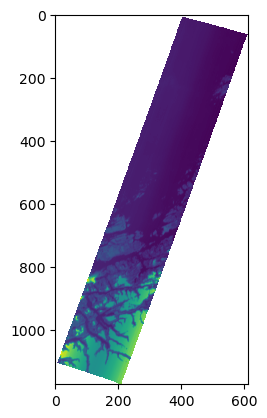

In [14]:
plt.imshow(resampled_l1b_cube[:,:,40])

### Resample chlorophyll estimates
- Note that you would normally apply land and cloud masks before running this

In [15]:
resampled_chlorophyll_estimates = satobj.resample_chlorophyll_estimates(area_def=area_def)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [16]:
resampled_chlorophyll_estimates['band_ratio']

<xarray.DataArray 'reshape-4d9cbe9ea64922046fa0d26bbfd26b7c' (y: 1173, x: 611)>
dask.array<reshape, shape=(1173, 611), dtype=float64, chunksize=(1173, 611), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -9.737e+04 -9.707e+04 ... 8.556e+04 8.586e+04
  * y        (y) float64 -2.631e+06 -2.631e+06 ... -2.983e+06 -2.983e+06
Attributes:
    model:    None

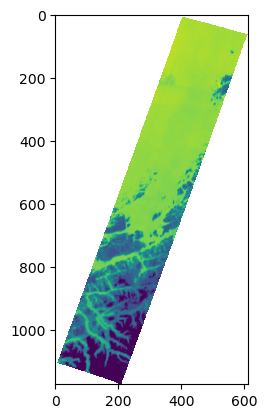

In [17]:
plt.imshow(resampled_chlorophyll_estimates['band_ratio'])

### Resample products

In [18]:
resampled_products = satobj.resample_products(area_def=area_def)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)
/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._c

In [19]:
resampled_products['demo_product_1']

<xarray.DataArray 'reshape-772bfa787b28312e4b1911fbe1c80719' (y: 1173, x: 611)>
dask.array<reshape, shape=(1173, 611), dtype=float64, chunksize=(1173, 611), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 -9.737e+04 -9.707e+04 ... 8.556e+04 8.586e+04
  * y        (y) float64 -2.631e+06 -2.631e+06 ... -2.983e+06 -2.983e+06

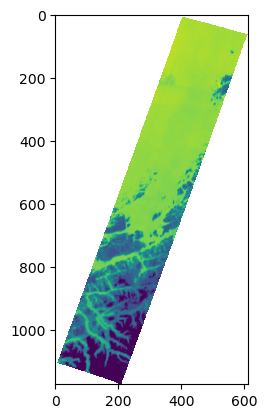

In [20]:
plt.imshow(resampled_products['demo_product_1'])

## Resample with SatPy

### Get L1A SatPy scene

In [21]:
l1a_scene = satobj.get_l1a_satpy_scene()

### Get L1B SatPy scene

In [22]:
l1b_scene = satobj.get_l1b_satpy_scene()

### Get chlorophyll estimates SatPy scene

In [23]:
chl_scene = satobj.get_chlorophyll_estimates_satpy_scene()

### Resample L1A SatPy scene

In [24]:
resampled_l1a_scene = l1a_scene.resample(area_def, resampler='bilinear', fill_value=np.NaN)

/home/cameron/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [25]:
resampled_l1a_scene

### Resample L1B SatPy scene

In [26]:
resampled_l1b_scene = l1b_scene.resample(area_def, resampler='bilinear', fill_value=np.NaN)

In [27]:
resampled_l1b_scene

### Resample chlorophyll estimates SatPy scene

In [28]:
resampled_chl_scene = chl_scene.resample(area_def, resampler='bilinear', fill_value=np.NaN)

In [29]:
resampled_chl_scene

### Convert a SatPy scene to NumPy

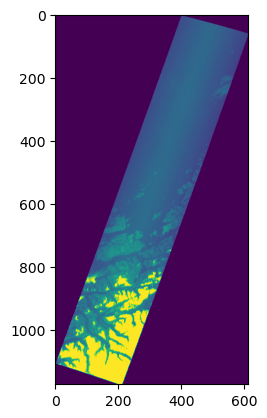

In [30]:
ds = resampled_l1a_scene.to_xarray()
ds = ds.drop_vars('frohavet')
ordered_ds = ds[sorted(ds.data_vars, key=lambda x: int(x.split('_')[1]))]
numpy_array = ordered_ds.to_array().to_numpy()
numpy_array = np.transpose(numpy_array, (1, 2, 0))

import matplotlib.pyplot as plt
plt.imshow(numpy_array[:,:,40])
